In [2]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np
import math
import matplotlib.colors
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
import json


import warnings
import torch
warnings.filterwarnings('ignore')

# Librosa

Well, first we *load* music. We do <code>librosa.load(path)</code>. Possible parameters are: <code>path</code> to audio file, sampling rate <code>sr</code> (default is 22050), <code>mono</code> (bool), <code>offset</code> (start after time in sec, float), <code>duration</code> (load up to sec, float), <code>dtype</code> (data type of y), <code>resample</code> (no idea what is it, but seems useless for my purposes).

As a resilt we get audio time series <code>y</code> and sampling rate <code>sr</code>.

**Sampling rate** or sampling frequency defines the number of samples per second (or per other unit) taken from a continuous signal to make a discrete or digital signal.

In [92]:
def librosa_exp(audio_path):
    y, sr = librosa.load(audio_path)
    features = librosa.feature.chroma_stft(y=y, sr=sr)
        
    print("Y is {}, it's len is {}".format(y, len(y)))
    print("sr is {}".format(sr))
    print("Features calculated are {}, len is {}, {}".format(features, len(features), len(features[0])))
    
    print("Prob secs is {}".format(len(y) / sr))
    
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(y, sr=sr)
    
    ipd.display(ipd.Audio(audio_path))
    
    X = librosa.stft(y)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

Y is [-1.4068222e-03 -4.4607258e-04 -4.1098078e-04 ...  7.9623060e-06
 -3.0417003e-05  1.2765067e-05], it's len is 117601
sr is 22050
Features calculated are [[0.01268931 0.00476418 0.00220375 ... 0.6945428  0.83568925 0.72109157]
 [0.01737126 0.0092613  0.0041347  ... 1.         1.         1.        ]
 [0.24865136 0.17127746 0.13228776 ... 0.7620491  0.7755511  0.7249426 ]
 ...
 [0.0289318  0.03560833 0.03301981 ... 0.72532403 0.91934973 0.56788015]
 [0.14620349 0.2070031  0.23984572 ... 0.7401624  0.86475945 0.5680077 ]
 [0.04447427 0.052455   0.05350786 ... 0.6673613  0.8152754  0.52209765]], len is 12, 230
Prob secs is 5.333378684807256


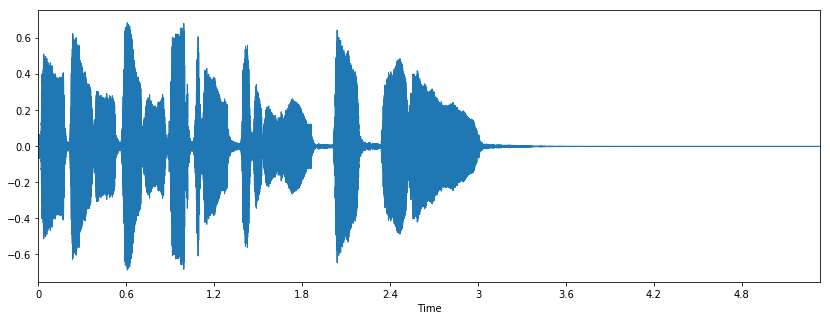

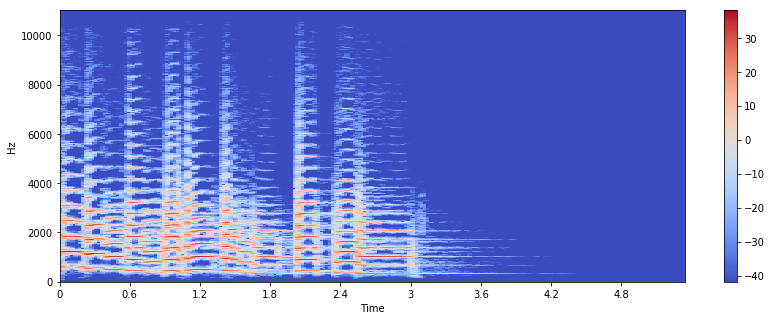

In [93]:
audio_path_1 = librosa.ex('trumpet')

librosa_exp(audio_path_1)

Y is [0. 0. 0. ... 0. 0. 0.], it's len is 1355168
sr is 22050
Features calculated are [[0.9144774  0.8811901  0.372436   ... 0.49422354 0.8308683  1.        ]
 [0.8906068  0.84053653 0.42876127 ... 0.70484453 0.8611023  0.86856914]
 [0.9330368  0.8343801  0.5353763  ... 0.93917745 1.         0.8736076 ]
 ...
 [0.8942374  0.9927351  0.46675935 ... 0.33320636 0.55092084 0.5918911 ]
 [0.68915254 0.9844811  0.33431038 ... 0.60297215 0.8582699  0.77263665]
 [1.         0.9191363  0.32518512 ... 0.69355565 0.9802198  0.9058264 ]], len is 12, 2647
Prob secs is 61.45886621315193


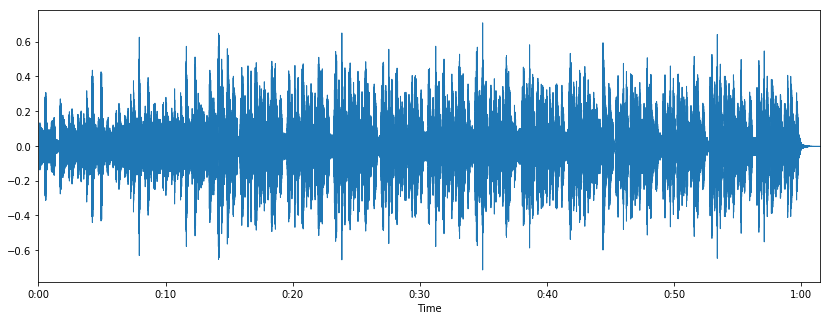

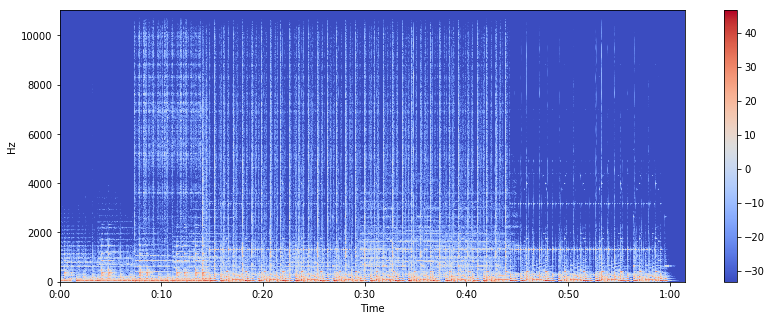

In [94]:
audio_path = librosa.util.example_audio_file()
librosa_exp(audio_path)

In [84]:
from os import walk
from os.path import isfile, join

mypath = "/Users/nastya_iva/Documents/2020-2021/курсовая/jim2012Chords (1)/Guitar_Only"

In [ ]:
f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(dirnames)
    break

files = {}
for dir in f:
    for (dirpath, dirnames, filenames) in walk(mypath + "/" + dir):
        filenames = [mypath + "/" + dir + "/" + i for i in filenames]
        if dir in files.keys():
            files[dir] = files[dir].extend(filenames)
        else:
            files[dir] = filenames

In [ ]:
files.keys()

In [4]:
class AudioWithFeature:
    def __init__(self, filename, chord, feature, duration):
        self.file = filename
        self.chord = chord
        self.feature = feature
        self.duration = duration
        
# class AudioWithFeatureJSONEncoder(JSONEncoder):
#         def default(self, o):
#             return o.__dict__

In [ ]:
from tqdm.notebook import tqdm, trange

In [ ]:
audio_with_feature_lst = []

for chord in tqdm(files.keys(), desc="processing chord folders"):
    chord_files = files[chord]
    
    for f in tqdm(chord_files, desc="processing files in {}".format(chord)):
        y, sr = librosa.load(f)
        
        feature = list(map(lambda x: np.mean(x).item(), librosa.feature.chroma_stft(y=y, sr=sr)))
        
        duration = librosa.get_duration(y, sr)

        audio_with_feature_lst.append(AudioWithFeature(f, chord, feature, duration))


In [ ]:
with open("guitar_features.json", 'w', encoding='utf-8') as f:
    json.dump([ob.__dict__ for ob in audio_with_feature_lst], f, ensure_ascii=False, indent=3)

In [106]:
def as_audio_with_feature(dct):
    return AudioWithFeature(dct['file'], dct['chord'], dct['feature'], dct['duration'])

with open("guitar_features.json", "r", encoding='utf-8') as f:
    audios = json.load(f, object_hook = as_audio_with_feature)
    
print(len(audios))
    
with open("Accordion.json", "r", encoding='utf-8') as f:
    accordion = json.load(f, object_hook = as_audio_with_feature)
    
with open("Guitar.json", "r", encoding='utf-8') as f:
    guitar = json.load(f, object_hook = as_audio_with_feature)
    
with open("Piano.json", "r", encoding='utf-8') as f:
    piano = json.load(f, object_hook = as_audio_with_feature)
    
with open("Violin.json", "r", encoding='utf-8') as f:
    violin = json.load(f, object_hook = as_audio_with_feature)

2000


In [107]:
audios.extend(accordion)
audios.extend(guitar)
audios.extend(piano)
audios.extend(violin)

In [108]:
audios = list(filter(lambda x: x.duration < 5, audios))

In [109]:
chords = sorted(list(set(map(lambda x: x.chord, audios))))
chords_dict = {chords[i]: i for i in range(len(chords))}
chords_dict

{'a': 0,
 'am': 1,
 'bm': 2,
 'c': 3,
 'd': 4,
 'dm': 5,
 'e': 6,
 'em': 7,
 'f': 8,
 'g': 9}

In [110]:
# data = pd.DataFrame({"feature": a.feature, "chord": chords_dict[a.chord] for a in audios}, columns=["feature", "chord"])

X = list(map(lambda x: x.feature, audios))
y = list(map(lambda x: chords_dict[x.chord], audios))

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=42)

In [112]:
X_train, X_test, y_train, y_test = map(torch.tensor, (X_train, X_test, y_train, y_test))

In [113]:
y_train

tensor([8, 2, 2,  ..., 8, 5, 0])

In [114]:
from torch import nn

class Feedforward(nn.Module):
    def __init__(self):
        super(Feedforward, self).__init__()
        self.hidden = torch.nn.Linear(12, 35)
        self.output = torch.nn.Linear(35, 10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
            
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

In [115]:
X_batches = torch.split(X_train, 20)
y_batches = torch.split(y_train, 20)

In [116]:
from tqdm.notebook import tqdm, trange
model = nn.Sequential(nn.Linear(12, 128),
                      nn.ReLU(),
                      nn.Linear(128, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.003)



epochs = 1000
for e in trange(epochs, desc="epochs processing"):
    running_loss = 0
    for i in trange(len(X_batches), desc="epoch {}".format(e)):
        x = X_batches[i]
        y = y_batches[i]
        
        # Training pass
        optimizer.zero_grad()
        
        output = model(x)
        
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(X_batches)}")


Training loss: 2.292196634269896



Training loss: 2.274566193421682



Training loss: 2.257572579951513



Training loss: 2.2409880473500206



Training loss: 2.224645134948549



Training loss: 2.2084203447614397



Training loss: 2.192212998867035



Training loss: 2.1759431787899564



Training loss: 2.159536727837154



Training loss: 2.142936973344712



Training loss: 2.1261063927695867



Training loss: 2.109010636806488



Training loss: 2.091620538915907



Training loss: 2.073908235345568



Training loss: 2.0558464441980635



Training loss: 2.03741298970722



Training loss: 2.0186119505337308



Training loss: 1.9994471896262396



Training loss: 1.979916084380377



Training loss: 1.9600188405740828



Training loss: 1.9397651865368797



Training loss: 1.9191786817141943



Training loss: 1.8982738313220797



Training loss: 1.8770673402718134



Training loss: 1.855591084275927



Training loss: 1.833863833120891



Training loss: 1.8119156119369326



Training loss: 1.7897547667934781



Training loss: 1.7674073633693514



Training loss: 1.7449099549225398



Training loss: 1.7223013128553117



Training loss: 1.6996084309759594



Training loss: 1.676859133300327



Training loss: 1.654080256110146



Training loss: 1.6312951431387948



Training loss: 1.6085364236718132



Training loss: 1.5858319330783117



Training loss: 1.5632116553329287



Training loss: 1.5407027985368456



Training loss: 1.5183324828034355



Training loss: 1.4961180474076952



Training loss: 1.474084646928878



Training loss: 1.45225451815696



Training loss: 1.4306431937785375



Training loss: 1.4092701687699272



Training loss: 1.3881496077492124



Training loss: 1.36730105252493



Training loss: 1.346739649772644



Training loss: 1.3264768478416262



Training loss: 1.306519118093309



Training loss: 1.2868780011222476



Training loss: 1.267568683340436



Training loss: 1.248593651113056



Training loss: 1.229958786850884



Training loss: 1.211671640475591



Training loss: 1.1937362338815416



Training loss: 1.1761542430945806



Training loss: 1.1589271596499853



Training loss: 1.1420591445196242



Training loss: 1.1255442329815455



Training loss: 1.1093812173321134



Training loss: 1.0935714358375186



Training loss: 1.0781114796797435



Training loss: 1.0629964882419223



Training loss: 1.0482221529597329



Training loss: 1.033788536276136



Training loss: 1.0196892094044459



Training loss: 1.0059179592700231



Training loss: 0.9924683946938742



Training loss: 0.9793363994076139



Training loss: 0.9665154005799975



Training loss: 0.9539988388617834



Training loss: 0.9417813867330551



Training loss: 0.9298544284843263



Training loss: 0.9182136867727552



Training loss: 0.9068541235867



Training loss: 0.8957693172352654



Training loss: 0.8849518760329201



Training loss: 0.8743949482838312



Training loss: 0.8640925749426797



Training loss: 0.854038879984901



Training loss: 0.8442273579892658



Training loss: 0.8346513751007262



Training loss: 0.8253039675099509



Training loss: 0.8161803065311342



Training loss: 0.8072737760487056



Training loss: 0.7985775023698807



Training loss: 0.790086030250504



Training loss: 0.7817932267983755



Training loss: 0.7736945769616536



Training loss: 0.7657837037529264



Training loss: 0.7580570294743493



Training loss: 0.7505099063827878



Training loss: 0.7431358006738481



Training loss: 0.7359293557348705



Training loss: 0.7288856108983358



Training loss: 0.722000124908629



Training loss: 0.7152696365401858



Training loss: 0.7086896619626454



Training loss: 0.7022544592618942



Training loss: 0.6959594708113443



Training loss: 0.6898032774527868



Training loss: 0.6837810185693559



Training loss: 0.6778886453026817



Training loss: 0.6721230326663881



Training loss: 0.6664800530388242



Training loss: 0.6609552992241723



Training loss: 0.6555461464893251



Training loss: 0.6502493172883987



Training loss: 0.6450612218607039



Training loss: 0.6399787735371363



Training loss: 0.6349993844827017



Training loss: 0.6301206925085613



Training loss: 0.6253390748585973



Training loss: 0.6206523687356994



Training loss: 0.6160569478358541



Training loss: 0.611551029696351



Training loss: 0.6071321471106439



Training loss: 0.6027975713922864



Training loss: 0.598545868836698



Training loss: 0.5943743937781879



Training loss: 0.590280604149614



Training loss: 0.5862632039047423



Training loss: 0.5823197311588696



Training loss: 0.5784483261051632



Training loss: 0.5746473556473142



Training loss: 0.5709150532881418



Training loss: 0.5672496025051389



Training loss: 0.5636490154124442



Training loss: 0.5601114045296397



Training loss: 0.556635207718327



Training loss: 0.5532187581771896



Training loss: 0.5498607520546231



Training loss: 0.5465591769842875



Training loss: 0.5433132911012286



Training loss: 0.5401217533009393



Training loss: 0.5369829049422628



Training loss: 0.5338956976220721



Training loss: 0.53085817219246



Training loss: 0.5278697244468189



Training loss: 0.5249287801839057



Training loss: 0.522034686590944



Training loss: 0.5191861806171281



Training loss: 0.516381928608531



Training loss: 0.5136206082644916



Training loss: 0.5109017033662114



Training loss: 0.5082239242536681



Training loss: 0.5055864304304123



Training loss: 0.5029884633563814



Training loss: 0.5004290913542112



Training loss: 0.49790711275168825



Training loss: 0.4954216835044679



Training loss: 0.49297200781958445



Training loss: 0.4905575925395602



Training loss: 0.4881772260580744



Training loss: 0.4858304723387673



Training loss: 0.48351647172655376



Training loss: 0.4812345306078593



Training loss: 0.47898391172999427



Training loss: 0.4767637447941871



Training loss: 0.47457348697242285



Training loss: 0.47241260004895075



Training loss: 0.47028051423174994



Training loss: 0.46817659657625926



Training loss: 0.4660998068395115



Training loss: 0.46405004532564254



Training loss: 0.4620263810668673



Training loss: 0.4600283986046201



Training loss: 0.45805588364601135



Training loss: 0.45610792615583967



Training loss: 0.45418454777626766



Training loss: 0.4522852095819655



Training loss: 0.45040924563294366



Training loss: 0.4485559772167887



Training loss: 0.44672500661441256



Training loss: 0.4449159602324168



Training loss: 0.44312847476629985



Training loss: 0.44136244910103933



Training loss: 0.43961706367276965



Training loss: 0.43789183100064594



Training loss: 0.4361867635023026



Training loss: 0.4345011427288964



Training loss: 0.4328349179455212



Training loss: 0.43118751510268166



Training loss: 0.42955904808782397



Training loss: 0.42794880732184365



Training loss: 0.4263566519532885



Training loss: 0.42478200296560925



Training loss: 0.42322440977607456



Training loss: 0.4216836073568889



Training loss: 0.420159223533812



Training loss: 0.4186511543535051



Training loss: 0.41715894426618305



Training loss: 0.4156824105552265



Training loss: 0.41422118140118463



Training loss: 0.4127752028760456



Training loss: 0.4113437824306034



Training loss: 0.4099268235620998



Training loss: 0.4085243500414349



Training loss: 0.40713590951192946



Training loss: 0.4057614377566746



Training loss: 0.40440072686899275



Training loss: 0.4030531893173854



Training loss: 0.40171910644996733



Training loss: 0.400397916280088



Training loss: 0.3990892448595592



Training loss: 0.39779339056639446



Training loss: 0.3965098902228333



Training loss: 0.3952386244421914



Training loss: 0.39397934451699257



Training loss: 0.39273155693496975



Training loss: 0.39149524129572366



Training loss: 0.3902705939752715



Training loss: 0.3890570882885229



Training loss: 0.3878545867545264



Training loss: 0.3866631539449805



Training loss: 0.3854821636563256



Training loss: 0.38431182592397645



Training loss: 0.3831518299522854



Training loss: 0.3820022032374427



Training loss: 0.3808628004931268



Training loss: 0.3797332953129496



Training loss: 0.37861367119919687



Training loss: 0.3775035423182306



Training loss: 0.3764030896127224



Training loss: 0.37531195261648725



Training loss: 0.3742301664536908



Training loss: 0.37315753989276434



Training loss: 0.37209389979640645



Training loss: 0.3710388078221253



Training loss: 0.36999248677775975



Training loss: 0.3689545914530754



Training loss: 0.36792534394633203



Training loss: 0.3669042606793699



Training loss: 0.36589160029377255



Training loss: 0.3648869664896102



Training loss: 0.3638902734078112



Training loss: 0.36290167591401506



Training loss: 0.36192092547814053



Training loss: 0.3609480833013852



Training loss: 0.3599828951770351



Training loss: 0.3590251193160102



Training loss: 0.35807467429410844



Training loss: 0.3571313869740282



Training loss: 0.3561952960278307



Training loss: 0.3552662551048256



Training loss: 0.3543440303986981



Training loss: 0.35342908437762943



Training loss: 0.35252086268294425



Training loss: 0.35161927271456944



Training loss: 0.3507243946549438



Training loss: 0.34983606246255694



Training loss: 0.34895431622862816



Training loss: 0.34807885047935305



Training loss: 0.34720951159085545



Training loss: 0.34634658889401526



Training loss: 0.3454898858354205



Training loss: 0.3446392397440615



Training loss: 0.3437946738586539



Training loss: 0.3429560528269836



Training loss: 0.34212334276664824



Training loss: 0.34129642517793746



Training loss: 0.34047525908265797



Training loss: 0.33965981130798656



Training loss: 0.33884998606074423



Training loss: 0.3380455681610675



Training loss: 0.33724660461857203



Training loss: 0.3364529950278146



Training loss: 0.3356647166822638



Training loss: 0.33488158668790546



Training loss: 0.3341035046392963



Training loss: 0.3333305354629244



Training loss: 0.3325626885607129



Training loss: 0.3317998071156797



Training loss: 0.3310418819032964



Training loss: 0.3302887993909064



Training loss: 0.32954067967477296



Training loss: 0.32879725311483654



Training loss: 0.3280586139077232



Training loss: 0.32732479079138666



Training loss: 0.32659563635076794



Training loss: 0.32587109772222383



Training loss: 0.32515102305582594



Training loss: 0.3244354630864802



Training loss: 0.3237245526342165



Training loss: 0.3230180869854632



Training loss: 0.322316201847224



Training loss: 0.32161865791394595



Training loss: 0.3209252039946261



Training loss: 0.32023584470152855



Training loss: 0.31955073756121455



Training loss: 0.31886979157016393



Training loss: 0.3181929150152774



Training loss: 0.31751998017231625



Training loss: 0.31685106243406025



Training loss: 0.3161860039191587



Training loss: 0.31552484010656673



Training loss: 0.31486745090002105



Training loss: 0.3142139633141813



Training loss: 0.3135640745361646



Training loss: 0.31291783849398297



Training loss: 0.3122753387405759



Training loss: 0.31163663044571877



Training loss: 0.31100149771996904



Training loss: 0.3103699082774775



Training loss: 0.309741973167374



Training loss: 0.3091176466218063



Training loss: 0.30849688890434446



Training loss: 0.3078794649669102



Training loss: 0.3072654065631685



Training loss: 0.3066546524919215



Training loss: 0.30604721250988187



Training loss: 0.3054430296733266



Training loss: 0.3048423228874093



Training loss: 0.3042448913412435



Training loss: 0.3036507573865709



Training loss: 0.3030599144597848



Training loss: 0.3024720711012681



Training loss: 0.30188741836519467



Training loss: 0.3013058416545391



Training loss: 0.3007274138785544



Training loss: 0.30015213663379353



Training loss: 0.2995798561189856



Training loss: 0.2990105714471567



Training loss: 0.2984442153856868



Training loss: 0.297880772678625



Training loss: 0.2973203419574669



Training loss: 0.2967628050772917



Training loss: 0.2962081391541731



Training loss: 0.2956562129159768



Training loss: 0.2951072051766373



Training loss: 0.2945610080801305



Training loss: 0.2940175708915506



Training loss: 0.2934767845131102



Training loss: 0.2929387717019944



Training loss: 0.29240347622405916



Training loss: 0.29187079270680744



Training loss: 0.2913405925390266



Training loss: 0.2908132104646592



Training loss: 0.2902883438482171



Training loss: 0.289766255233969



Training loss: 0.28924647913802237



Training loss: 0.2887293946530138



Training loss: 0.2882148213684559



Training loss: 0.2877027317881584



Training loss: 0.2871931800175281



Training loss: 0.2866859696805477



Training loss: 0.28618132784253075



Training loss: 0.28567900508642197



Training loss: 0.2851791573422296



Training loss: 0.2846814938599155



Training loss: 0.28418618351930663



Training loss: 0.28369333612776937



Training loss: 0.28320266270921346



Training loss: 0.2827145891884963



Training loss: 0.28222861442537533



Training loss: 0.2817449826924574



Training loss: 0.2812636790885812



Training loss: 0.2807843814648333



Training loss: 0.28030738624788465



Training loss: 0.27983266576415017



Training loss: 0.2793598976873216



Training loss: 0.2788894896705945



Training loss: 0.27842125704600695



Training loss: 0.2779551407410985



Training loss: 0.277491196280434



Training loss: 0.27702920014659566



Training loss: 0.2765693740830535



Training loss: 0.2761114775424912



Training loss: 0.2756557656185968



Training loss: 0.2752020683671747



Training loss: 0.2747502186823459



Training loss: 0.2743005135229656



Training loss: 0.2738527733655203



Training loss: 0.2734070492997056



Training loss: 0.27296315594798043



Training loss: 0.27252132782623884



Training loss: 0.2720814897190957



Training loss: 0.2716436469483943



Training loss: 0.27120774736007053



Training loss: 0.2707737097073169



Training loss: 0.2703417261086759



Training loss: 0.2699113961841379



Training loss: 0.2694828732027894



Training loss: 0.26905620257769314



Training loss: 0.2686314648460774



Training loss: 0.2682085886952423



Training loss: 0.26778743433810415



Training loss: 0.26736801117658615



Training loss: 0.2669504717701957



Training loss: 0.2665346990383807



Training loss: 0.2661207371524402



Training loss: 0.2657085270399139



Training loss: 0.2652982659637928



Training loss: 0.26488966548017095



Training loss: 0.2644828162377789



Training loss: 0.2640776554388659



Training loss: 0.2636742109344119



Training loss: 0.26327246321099146



Training loss: 0.2628723523091702



Training loss: 0.2624739467033318



Training loss: 0.26207723858810605



Training loss: 0.2616821142534415



Training loss: 0.2612884697459993



Training loss: 0.2608965406460421



Training loss: 0.26050636349689393



Training loss: 0.26011758155765985



Training loss: 0.2597304364400251



Training loss: 0.25934484671978725



Training loss: 0.25896084894027027



Training loss: 0.2585782516925108



Training loss: 0.25819727228510947



Training loss: 0.2578179515188649



Training loss: 0.25743998853223665



Training loss: 0.25706359034492854



Training loss: 0.2566887110116936



Training loss: 0.2563151853779952



Training loss: 0.25594320041792734



Training loss: 0.2555727144437177



Training loss: 0.25520361223745913



Training loss: 0.25483595579862595



Training loss: 0.2544697152361983



Training loss: 0.2541048427422841



Training loss: 0.25374151810648893



Training loss: 0.2533795154165654



Training loss: 0.2530188936562765



Training loss: 0.25265966409019064



Training loss: 0.25230179860123564



Training loss: 0.2519453300961426



Training loss: 0.25159025538180557



Training loss: 0.2512364928566274



Training loss: 0.250884115163769



Training loss: 0.25053305223229383



Training loss: 0.250183298829056



Training loss: 0.24983498933059828



Training loss: 0.24948790208214805



Training loss: 0.24914220552004518



Training loss: 0.24879771142843224



Training loss: 0.2484546515735842



Training loss: 0.24811278558557942



Training loss: 0.24777228651302202



Training loss: 0.2474330598931937



Training loss: 0.24709519442348254



Training loss: 0.24675843367973962



Training loss: 0.24642273730465344



Training loss: 0.24608843268028327



Training loss: 0.2457553187296504



Training loss: 0.24542330187701045



Training loss: 0.24509275917496



Training loss: 0.24476339623686813



Training loss: 0.24443539427149863



Training loss: 0.24410845268340337



Training loss: 0.24378274248114654



Training loss: 0.24345809788930983



Training loss: 0.24313466330724104



Training loss: 0.24281236201169945



Training loss: 0.24249131924339704



Training loss: 0.24217139752138228



Training loss: 0.24185253209656193



Training loss: 0.2415348074975468



Training loss: 0.24121824953527676



Training loss: 0.24090284064766906



Training loss: 0.24058843421794118



Training loss: 0.2402751450205133



Training loss: 0.23996307541217124



Training loss: 0.2396520825901202



Training loss: 0.23934208725889525



Training loss: 0.2390332558147964



Training loss: 0.23872541600749606



Training loss: 0.23841859533318452



Training loss: 0.23811295779333227



Training loss: 0.23780838710566363



Training loss: 0.23750474170914718



Training loss: 0.23720227705226057



Training loss: 0.236900819465518



Training loss: 0.2366001692024015



Training loss: 0.23630085392367273



Training loss: 0.23600227811506816



Training loss: 0.23570472090726807



Training loss: 0.2354083094923269



Training loss: 0.23511281733711561



Training loss: 0.23481828657289347



Training loss: 0.2345247446071534



Training loss: 0.23423228483824504



Training loss: 0.233940650043743



Training loss: 0.23364998976744356



Training loss: 0.23336023934895084



Training loss: 0.23307149422665438



Training loss: 0.23278351518369855



Training loss: 0.2324966461885543



Training loss: 0.2322107543725343



Training loss: 0.2319257530782904



Training loss: 0.2316416423058226



Training loss: 0.23135864920914173



Training loss: 0.23107644596270152



Training loss: 0.23079528686191356



Training loss: 0.2305149951328834



Training loss: 0.23023575083130882



Training loss: 0.2299574324417682



Training loss: 0.22967991028868018



Training loss: 0.22940319687837646



Training loss: 0.2291273529685679



Training loss: 0.22885237181825296



Training loss: 0.2285782601684332



Training loss: 0.22830502174439884



Training loss: 0.22803265814270293



Training loss: 0.22776111694318907



Training loss: 0.22749027104250022



Training loss: 0.22722050423423448



Training loss: 0.2269516233354807



Training loss: 0.22668346478825524



Training loss: 0.22641613245719955



Training loss: 0.2261500224648487



Training loss: 0.22588434123567172



Training loss: 0.22561984970456078



Training loss: 0.22535590038058304



Training loss: 0.22509295936851276



Training loss: 0.22483100990454355



Training loss: 0.22456937726764453



Training loss: 0.22430883392336823



Training loss: 0.2240491666431938



Training loss: 0.22379000839732943



Training loss: 0.22353178457844824



Training loss: 0.22327448800206184



Training loss: 0.22301761850359894



Training loss: 0.22276167154666923



Training loss: 0.2225067283780802



Training loss: 0.22225214221647807



Training loss: 0.2219984330946491



Training loss: 0.22174581530548276



Training loss: 0.22149340781782353



Training loss: 0.2212422044859046



Training loss: 0.22099185601941176



Training loss: 0.2207419059815861



Training loss: 0.22049287981575444



Training loss: 0.2202448748229515



Training loss: 0.21999718798767953



Training loss: 0.21975043265237695



Training loss: 0.21950464509427547



Training loss: 0.21925926935814677



Training loss: 0.21901480569725945



Training loss: 0.21877129624287286



Training loss: 0.21852815763226577



Training loss: 0.21828586900872843



Training loss: 0.21804459091453327



Training loss: 0.21780352808889888



Training loss: 0.21756344838511377



Training loss: 0.2173243166790122



Training loss: 0.21708539589529946



Training loss: 0.2168476411274501



Training loss: 0.21661002632407916



Training loss: 0.21637348307385332



Training loss: 0.21613760159483977



Training loss: 0.21590221557943595



Training loss: 0.21566761879339105



Training loss: 0.21543391758487337



Training loss: 0.21520043767633892



Training loss: 0.21496776686537833



Training loss: 0.214736064097711



Training loss: 0.21450442838526906



Training loss: 0.2142738934961103



Training loss: 0.21404407723318963



Training loss: 0.21381456715365252



Training loss: 0.21358623967639037



Training loss: 0.21335802972316742



Training loss: 0.21313075348734856



Training loss: 0.21290412137196177



Training loss: 0.21267788325037276



Training loss: 0.21245252890955835



Training loss: 0.2122276784586055



Training loss: 0.2120035763475157



Training loss: 0.2117799762636423



Training loss: 0.21155747141511666



Training loss: 0.21133484673641978



Training loss: 0.21111352058748403



Training loss: 0.2108923060198625



Training loss: 0.21067193132780848



Training loss: 0.21045240555845557



Training loss: 0.21023303554171607



Training loss: 0.2100146771186874



Training loss: 0.20979693265897886



Training loss: 0.20957955602733863



Training loss: 0.20936274546242895



Training loss: 0.2091468017370928



Training loss: 0.2089310727481331



Training loss: 0.20871615072801



Training loss: 0.20850205031179248



Training loss: 0.208288038592963



Training loss: 0.2080749198794365



Training loss: 0.20786201075783797



Training loss: 0.2076500476825805



Training loss: 0.20743861785602002



Training loss: 0.20722753332839125



Training loss: 0.20701739475840614



Training loss: 0.20680747190046878



Training loss: 0.20659804938449747



Training loss: 0.20638944093315376



Training loss: 0.20618152831281936



Training loss: 0.2059736479783342



Training loss: 0.20576714564646995



Training loss: 0.20556041926500343



Training loss: 0.20535469835712797



Training loss: 0.20514959886315323



Training loss: 0.204944867019852



Training loss: 0.2047406837698959



Training loss: 0.20453747486074766



Training loss: 0.20433417326282888



Training loss: 0.20413172085370337



Training loss: 0.20393004640936852



Training loss: 0.20372852807243666



Training loss: 0.20352765607337156



Training loss: 0.20332751165898072



Training loss: 0.20312762136260668



Training loss: 0.20292821295914196



Training loss: 0.20272977206678616



Training loss: 0.20253105230984234



Training loss: 0.20233348056319214



Training loss: 0.2021363934590703



Training loss: 0.2019394085343395



Training loss: 0.2017431396636225



Training loss: 0.2015474530912581



Training loss: 0.20135192714986347



Training loss: 0.20115714156556697



Training loss: 0.2009629328690824



Training loss: 0.20076898636207693



Training loss: 0.2005754890186446



Training loss: 0.20038304486799807



Training loss: 0.2001905403144303



Training loss: 0.19999857450879754



Training loss: 0.19980737043633348



Training loss: 0.19961633879159177



Training loss: 0.1994260403194598



Training loss: 0.1992363736388229



Training loss: 0.1990465596318245



Training loss: 0.1988577852469115



Training loss: 0.19866925566678956



Training loss: 0.19848139193795977



Training loss: 0.1982937360271102



Training loss: 0.19810685169483935



Training loss: 0.19791994705086663



Training loss: 0.19773403430978456



Training loss: 0.19754839990110623



Training loss: 0.19736302954455218



Training loss: 0.19717805947931039



Training loss: 0.19699434811870256



Training loss: 0.19681015548606715



Training loss: 0.19662659162921564



Training loss: 0.19644424594229176



Training loss: 0.19626135299248354



Training loss: 0.19607964415280593



Training loss: 0.1958981937773171



Training loss: 0.19571675111850104



Training loss: 0.1955364439636469



Training loss: 0.1953558028631267



Training loss: 0.19517621921286696



Training loss: 0.19499702325889043



Training loss: 0.19481799582995118



Training loss: 0.1946393269158545



Training loss: 0.19446157256052607



Training loss: 0.19428351752105213



Training loss: 0.19410635513209162



Training loss: 0.19392970018088818



Training loss: 0.19375323761431945



Training loss: 0.19357702002993651



Training loss: 0.19340180179902486



Training loss: 0.19322627951346694



Training loss: 0.19305178425496533



Training loss: 0.19287731329954805



Training loss: 0.1927034884159054



Training loss: 0.19253026215093477



Training loss: 0.1923569498494977



Training loss: 0.19218421691939944



Training loss: 0.19201201927803813



Training loss: 0.19183997934063277



Training loss: 0.19166829419277964



Training loss: 0.19149739215416567



Training loss: 0.19132653313378492



Training loss: 0.19115601142957098



Training loss: 0.19098642956288087



Training loss: 0.19081655437392847



Training loss: 0.19064778657186598



Training loss: 0.1904786785266229



Training loss: 0.19031029673559324



Training loss: 0.19014253316535837



Training loss: 0.18997467593068168



Training loss: 0.18980736205620424



Training loss: 0.18964087838927904



Training loss: 0.1894740999809333



Training loss: 0.18930803523177192



Training loss: 0.18914260014536835



Training loss: 0.18897708425564425



Training loss: 0.188812141351047



Training loss: 0.18864789161653744



Training loss: 0.1884834361040876



Training loss: 0.1883198486729747



Training loss: 0.18815624518763452



Training loss: 0.1879932526499033



Training loss: 0.18783096108762992



Training loss: 0.18766843075198786



Training loss: 0.1875066180669126



Training loss: 0.1873451407466616



Training loss: 0.18718391266607104



Training loss: 0.18702316204352037



Training loss: 0.1868629644491843



Training loss: 0.18670263646968774



Training loss: 0.18654311111285574



Training loss: 0.18638370079653604



Training loss: 0.1862246779104074



Training loss: 0.18606623820960522



Training loss: 0.18590771131927059



Training loss: 0.1857496994946684



Training loss: 0.18559220832373416



Training loss: 0.1854349340179137



Training loss: 0.18527806922793388



Training loss: 0.18512171036785557



Training loss: 0.18496556979204928



Training loss: 0.18480976741938365



Training loss: 0.18465425845767772



Training loss: 0.18449941543596132



Training loss: 0.1843444714766173



Training loss: 0.18419005384757406



Training loss: 0.18403633701659383



Training loss: 0.18388241919733228



Training loss: 0.18372880046566328



Training loss: 0.18357607961765357



Training loss: 0.18342314660549164



Training loss: 0.18327076892767633



Training loss: 0.18311875588482335



Training loss: 0.1829667766356752



Training loss: 0.18281529116488637



Training loss: 0.18266464494878337



Training loss: 0.18251336995689643



Training loss: 0.18236283851521357



Training loss: 0.18221303625475793



Training loss: 0.18206303682000863



Training loss: 0.18191344583673136



Training loss: 0.18176438446555818



Training loss: 0.18161558936394395



Training loss: 0.18146680082593644



Training loss: 0.18131893678080468



Training loss: 0.18117080194254717



Training loss: 0.18102331557089374



Training loss: 0.18087609564619406



Training loss: 0.1807293805870272



Training loss: 0.1805824984219812



Training loss: 0.1804364515202386



Training loss: 0.18029049642029263



Training loss: 0.18014466664975598



Training loss: 0.17999918670171783



Training loss: 0.17985425224261625



Training loss: 0.1797094332675139



Training loss: 0.17956464178860188



Training loss: 0.17942086616087527



Training loss: 0.1792766913949024



Training loss: 0.1791331795532079



Training loss: 0.1789903404812018



Training loss: 0.17884714839359125



Training loss: 0.17870434338138216



Training loss: 0.17856220776836076



Training loss: 0.17842020511272408



Training loss: 0.1782782543450594



Training loss: 0.17813720146105402



Training loss: 0.17799591290808858



Training loss: 0.17785494011782466



Training loss: 0.17771455379469053



Training loss: 0.17757423355111054



Training loss: 0.17743407287413165



Training loss: 0.17729452296736695



Training loss: 0.17715512828103133



Training loss: 0.17701605068785803



Training loss: 0.1768774405299198



Training loss: 0.1767390107824689



Training loss: 0.1766007539062273



Training loss: 0.17646310806629203



Training loss: 0.17632511657263553



Training loss: 0.17618806855309577



Training loss: 0.17605110577174596



Training loss: 0.1759142472985245



Training loss: 0.17577798939531758



Training loss: 0.17564201585593678



Training loss: 0.1755060310519877



Training loss: 0.17537026364533675



Training loss: 0.1752352782835563



Training loss: 0.17510019508855684



Training loss: 0.17496522276529244



Training loss: 0.17483102299627803



Training loss: 0.17469676220346064



Training loss: 0.1745627351282608



Training loss: 0.17442941896262623



Training loss: 0.17429589471291929



Training loss: 0.17416287337740263



Training loss: 0.17402988991567067



Training loss: 0.1738973290082954



Training loss: 0.17376523269783883



Training loss: 0.1736330757183688



Training loss: 0.17350111334096818



Training loss: 0.17337002915640673



Training loss: 0.17323869404693445



Training loss: 0.1731074701639868



Training loss: 0.17297709511504286



Training loss: 0.17284631560600938



Training loss: 0.1727162201312326



Training loss: 0.1725865679660014



Training loss: 0.1724565868221578



Training loss: 0.17232732102274895



Training loss: 0.17219831324404195



Training loss: 0.1720689871304092



Training loss: 0.17194066347465628



Training loss: 0.17181230061465785



Training loss: 0.17168416118337995



Training loss: 0.17155594671411173



Training loss: 0.17142878206712858



Training loss: 0.17130110412836075



Training loss: 0.17117398693448022



Training loss: 0.17104717672225975



Training loss: 0.17092043374265944



Training loss: 0.17079440708316507



Training loss: 0.17066765931390582



Training loss: 0.17054171443340324



Training loss: 0.17041643895208836



Training loss: 0.1702906588713328



Training loss: 0.1701653695532254



Training loss: 0.17004055033127466



Training loss: 0.16991578636779672



Training loss: 0.16979112662374973



Training loss: 0.16966676029066244



Training loss: 0.16954288950988225



Training loss: 0.1694193578192166



Training loss: 0.1692954371905043



Training loss: 0.16917216627015955



Training loss: 0.1690495680308058



Training loss: 0.1689262091226521



Training loss: 0.16880364086301552



Training loss: 0.16868157507408232



Training loss: 0.16855908247331777



Training loss: 0.16843730344304017



Training loss: 0.16831574872845695



Training loss: 0.1681942685196797



Training loss: 0.16807281598448753



Training loss: 0.1679522798707088



Training loss: 0.16783115906374796



Training loss: 0.1677109585808856



Training loss: 0.16759036960346357



Training loss: 0.16747053322337924



Training loss: 0.16735058712462583



Training loss: 0.16723071774911313



Training loss: 0.16711154411591234



Training loss: 0.16699217109098322



Training loss: 0.16687320208265669



Training loss: 0.16675431529680887



Training loss: 0.16663627645799092



Training loss: 0.16651735827326775



Training loss: 0.16639943190273784



Training loss: 0.16628178102629526



Training loss: 0.16616378493961834



Training loss: 0.16604628413915634



Training loss: 0.16592912340448016



Training loss: 0.16581184789538383



Training loss: 0.1656953983363651



Training loss: 0.16557831689715385



Training loss: 0.16546199178057058



Training loss: 0.16534589195535296



Training loss: 0.16522980995831035



Training loss: 0.16511361646865094



Training loss: 0.1649982471551214



Training loss: 0.16488263055327393



Training loss: 0.16476747686309473



Training loss: 0.16465227917901107



Training loss: 0.1645374001846427



Training loss: 0.16442275996364297



Training loss: 0.1643087180952231



Training loss: 0.16419383227115586



Training loss: 0.1640805405165468



Training loss: 0.16396580760677656



Training loss: 0.1638519787894828



Training loss: 0.1637387979953062



Training loss: 0.16362522232035795



Training loss: 0.16351219816576867



Training loss: 0.16339928435073012



Training loss: 0.1632866281129065



Training loss: 0.16317372494155452



Training loss: 0.16306171229197866



Training loss: 0.16294936764807927



Training loss: 0.16283743207653364



Training loss: 0.16272546723484993



Training loss: 0.1626139073854401



Training loss: 0.16250255322527318



Training loss: 0.1623910962648335



Training loss: 0.16227994486689568



Training loss: 0.16216959884124144



Training loss: 0.16205864922986143



Training loss: 0.16194799214246727



Training loss: 0.16183828065792719



Training loss: 0.16172760627454236



Training loss: 0.16161793931609109



Training loss: 0.16150864444318272



Training loss: 0.1613986820337318



Training loss: 0.16128977618756749



Training loss: 0.1611803634358304



Training loss: 0.16107162451815038



Training loss: 0.16096324012393043



Training loss: 0.16085455513426236



Training loss: 0.1607461271452762



Training loss: 0.1606384160085803



Training loss: 0.16052981696668125



Training loss: 0.1604222021996975



Training loss: 0.16031480358824843



Training loss: 0.16020736958654153



Training loss: 0.16010013338001



Training loss: 0.15999313364071505



Training loss: 0.1598862332424947



Training loss: 0.1597796685638882



Training loss: 0.15967377594539098



Training loss: 0.15956712682687102



Training loss: 0.15946104169069303



Training loss: 0.15935523790262995



Training loss: 0.15924977386991182



Training loss: 0.1591441043253456



Training loss: 0.15903875329309985



Training loss: 0.1589335435557933



Training loss: 0.1588289478261556



Training loss: 0.15872357892138617



Training loss: 0.1586191856435367



Training loss: 0.15851513775331633



Training loss: 0.15841063506723868



Training loss: 0.15830648881161496



Training loss: 0.15820332115427369



Training loss: 0.15809913893185912



Training loss: 0.1579958771665891



Training loss: 0.15789297684317544



Training loss: 0.15778923824074723



Training loss: 0.1576868894820412



Training loss: 0.1575838171743921



Training loss: 0.1574813917811428



Training loss: 0.1573792069795586



Training loss: 0.15727660104277588



Training loss: 0.1571747124904678



Training loss: 0.15707264756340356



Training loss: 0.15697145142725535



Training loss: 0.1568695009641704



Training loss: 0.15676834416531382



Training loss: 0.15666710319263594



Training loss: 0.15656584966927767



Training loss: 0.1564655281780731



Training loss: 0.15636420303157397



Training loss: 0.1562637442811614



Training loss: 0.15616364027595236



Training loss: 0.15606329590082169



Training loss: 0.1559629583110412



Training loss: 0.15586360464138643



Training loss: 0.15576325308176733



Training loss: 0.15566408616446314



Training loss: 0.15556487090708243



Training loss: 0.1554651874161902



Training loss: 0.15536624587894904



Training loss: 0.1552675242225329



Training loss: 0.15516841957079514



Training loss: 0.15507023896844613



Training loss: 0.15497197357139417



Training loss: 0.15487332992433084



Training loss: 0.1547759740746447



Training loss: 0.15467754720399776



Training loss: 0.15458018856034392



Training loss: 0.15448274241671675



Training loss: 0.15438494534187375



Training loss: 0.15428808296010607



Training loss: 0.1541907809497345



Training loss: 0.15409415698654594



Training loss: 0.15399741665238426



Training loss: 0.15390080692512648



Training loss: 0.153804189037709



Training loss: 0.15370769124655498



Training loss: 0.1536120009564218



Training loss: 0.15351563159908568



Training loss: 0.15341994339334114



Training loss: 0.1533242625938285



Training loss: 0.15322879080971083



Training loss: 0.15313326855677933



Training loss: 0.15303813395578236



Training loss: 0.1529429331421852



Training loss: 0.1528477290911334



Training loss: 0.1527535379199045



Training loss: 0.15265841338606106



Training loss: 0.1525640878382893



Training loss: 0.15247031984229883



Training loss: 0.15237564336331116



Training loss: 0.15228192836401008



Training loss: 0.1521881427172394



Training loss: 0.15209418176008122



Training loss: 0.15200078997406222



Training loss: 0.1519077644639072



Training loss: 0.15181434473821095



Training loss: 0.1517209704255774



Training loss: 0.15162848725560166



Training loss: 0.15153515516292482



Training loss: 0.15144286100708304



Training loss: 0.15135028333004033



Training loss: 0.15125798606978996



Training loss: 0.15116547167833363



Training loss: 0.1510735395408812



In [117]:
predicted_test = torch.argmax(model(X_test), dim=1)
predicted_train = torch.argmax(model(X_train), dim=1)

In [118]:
from sklearn.metrics import accuracy_score

print("accuracy test {}".format(accuracy_score(y_test, predicted_test)))
print("accuracy train {}".format(accuracy_score(y_train, predicted_train)))

accuracy test 0.952712100139082
accuracy train 0.9618366129994037


In [87]:
p = "/Users/nastya_iva/Documents/2020-2021/курсовая/jim2012Chords (1)/Other_Instruments/"

In [81]:
def get_chords(path):
    name = path.split("/")[-1]
    f = []
    for (dirpath, dirnames, filenames) in walk(path):
        f.extend(dirnames)
        break

    files = {}
    for dir in f:
        for (dirpath, dirnames, filenames) in walk(path + "/" + dir):
            filenames = [path + "/" + dir + "/" + i for i in filenames]
            if dir in files.keys():
                files[dir] = files[dir].extend(filenames)
            else:
                files[dir] = filenames

    audio_with_feature_lst = []

    for chord in tqdm(files.keys(), desc="processing chord folders"):
        chord_files = files[chord]

        for f in tqdm(chord_files, desc="processing files in {}".format(chord)):
            y, sr = librosa.load(f)

            feature = list(map(lambda x: np.mean(x).item(), librosa.feature.chroma_stft(y=y, sr=sr)))

            duration = librosa.get_duration(y, sr)

            audio_with_feature_lst.append(AudioWithFeature(f, chord, feature, duration))
    with open("{}.json".format(name), 'w', encoding='utf-8') as f:
        json.dump([ob.__dict__ for ob in audio_with_feature_lst], f, ensure_ascii=False, indent=3)

In [85]:
get_chords(p + "Accordion")

In [88]:
get_chords(p + "Guitar")

In [89]:
get_chords(p + "Piano")

In [90]:
get_chords(p + "Violin")

In [91]:
with open("Accordion.json", "r", encoding='utf-8') as f:
    accordion = json.load(f, object_hook = as_audio_with_feature)
    
with open("Guitar.json", "r", encoding='utf-8') as f:
    guitar = json.load(f, object_hook = as_audio_with_feature)
    
with open("Piano.json", "r", encoding='utf-8') as f:
    piano = json.load(f, object_hook = as_audio_with_feature)
    
with open("Violin.json", "r", encoding='utf-8') as f:
    violin = json.load(f, object_hook = as_audio_with_feature)

In [101]:
X_accordion = torch.tensor(list(map(lambda x: x.feature, violin)))
y_accordion = torch.tensor(list(map(lambda x: chords_dict[x.chord], violin)))

In [102]:
predicted_accordion = torch.argmax(model(X_accordion), dim=1)

print("accuracy test {}".format(accuracy_score(y_accordion, predicted_accordion)))

accuracy test 0.82
